In [1]:
import numpy as np
import matplotlib.pyplot as plt
# fs = 12
plt.style.use('nrelplot')
# plt.rc('font', family='serif')
# plt.rc('font', size=fs)
# plt.rc('facecolor', )

# %load_ext autoreload
# %autoreload 2


In [2]:
## constants
zhub = 80 # m 
beta = 6.4 
T = 12 # s
D = 80 # m

ztop = 122 # zhub+D/2 #m 
zbot = 38 # zhub-D/2 # m

b=5.6 # m/ds
Iref = 0.16 # TI 
Vref = 50 # m/s
Lambda1_top = 42 # m
Lambda1_bot = 0.7 * zbot
    
alpha_nom = 0.2

In [3]:
## variables
t = np.linspace(0, T, 101) # s
z = np.linspace(0, 150, 101)

# apos = np.zeros(nspds)
# aneg = np.zeros(nspds)

Vhub=25
sigma1 = Iref * (0.75 * Vhub + b)

Vpos = np.zeros((len(z), len(t)))
Vneg = np.zeros((len(z), len(t)))

Lambda1 = 0.7*z
Lambda1[z >= 60] =42 

for ti, tt in enumerate(t):
    
    for zi, zz in enumerate(z):
        
        ## extreme positive shear
        
        Vpos[zi,ti] = Vhub * (zz/zhub)**alpha_nom + ((zz-zhub)/D)*(2.5 + 0.2 * beta * sigma1 * (D/Lambda1[zi])**0.25) * (1 - np.cos(2*np.pi*tt/T))
        
        Vneg[zi,ti] = Vhub * (zz/zhub)**alpha_nom - ((zz-zhub)/D)*(2.5 + 0.2 * beta * sigma1 * (D/Lambda1[zi])**0.25) * (1 - np.cos(2*np.pi*tt/T))


/Users/nhamilto/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars
/Users/nhamilto/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars
/Users/nhamilto/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in double_scalars
/Users/nhamilto/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


In [16]:
z.shape

(101,)

In [18]:
Vhub

40.0

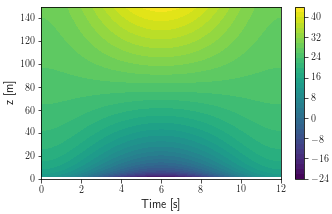

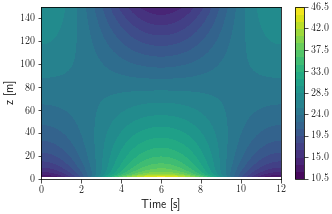

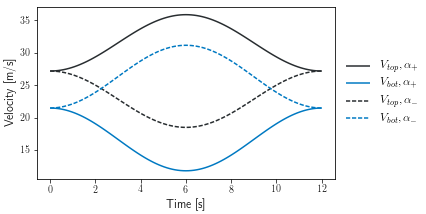

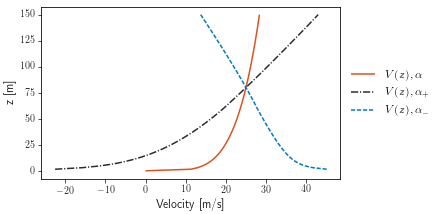

In [20]:
# iztop = np.argmin(np.abs(z))
Vhub = 25

fig,ax = plt.subplots(figsize=(5,3))
cn = ax.contourf(t, z, Vpos, 32)
fig.colorbar(cn)
ax.set_xlabel('Time [s]')
ax.set_ylabel('z [m]')

fig,ax = plt.subplots(figsize=(5,3))
cn = ax.contourf(t, z, Vneg, 32)
fig.colorbar(cn)
ax.set_xlabel('Time [s]')
ax.set_ylabel('z [m]')

ztopind = np.argmin(np.abs(z - ztop))
zbotind = np.argmin(np.abs(z - zbot))

fig,ax = plt.subplots(figsize=(5,3))
ax.plot(t, Vpos[ztopind,:], c='C0', ls='-', label=r'$V_{top}, \alpha_+$')
ax.plot(t, Vpos[zbotind,:], c='C1', ls='-', label=r'$V_{bot}, \alpha_+$')
ax.plot(t, Vneg[ztopind,:], c='C0', ls='--', label=r'$V_{top}, \alpha_-$')
ax.plot(t, Vneg[zbotind,:], c='C1', ls='--', label=r'$V_{bot}, \alpha_-$')
ax.legend(loc=6, bbox_to_anchor=(1,0.5), frameon=False)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Velocity [m/s]')
# fig.savefig('../figs_20181227/EWS_velocity_transients.png', dpi=200, bbox_inches='tight')

fig,ax = plt.subplots(figsize=(5,3))
Vnom = Vhub * (z/zhub)**alpha_nom
ax.plot(Vnom, z, c='C2', ls='-', label=r'$V(z), \alpha$')
ax.plot(Vpos[:,50], z, c='C0', ls='-.', label=r'$V(z), \alpha_+$')
ax.plot(Vneg[:,50], z, c='C1', ls='--', label=r'$V(z), \alpha_-$')
ax.legend(loc=6, bbox_to_anchor=(1,0.5), frameon=False)
ax.set_ylabel('z [m]')
ax.set_xlabel('Velocity [m/s]')
fig.savefig('../figs_20181227/EWS_profile_comp.png', dpi=200, bbox_inches='tight')

In [5]:
# limit of hub-height velocity for defined alpha
Vhub_lim_pos_alpha = - 2 * ((zbot - zhub) / D) * (2.5 + 0.2 * beta * Iref * (D / Lambda1_bot)**(1/4) * b) / ((zbot / zhub)**alpha_nom + 2*((zbot - zhub) / D) * (0.15 * beta * Iref * (D / Lambda1_bot)**(1/4) ))
print('limit of Vhub for positive alpha = {}'.format(Vhub_lim_pos_alpha))

# confirm that vbot = zero at lim
Vbot = Vhub_lim_pos_alpha * (zbot/zhub)**alpha_nom + ((zbot-zhub)/D)*(2.5 + 0.2 * beta * Iref * (0.75 * Vhub_lim_pos_alpha + b) * (D/Lambda1_bot)**0.25) * 2
print(Vbot)

limit of Vhub for positive alpha = 6.485436663162395
-8.881784197001252e-16


In [7]:
## variables
t = np.linspace(0,T,101) # s

nspds = 101
apos = np.zeros(nspds)
aneg = np.zeros(nspds)
vhubs = np.linspace(np.round(Vhub_lim_pos_alpha,1), 40, nspds)

for vi, Vhub in enumerate(vhubs):
    
    # Normal turbulence model
    # turbulence standard deviation
    sigma1 = Iref * (0.75 * Vhub + b)
    
    ## extreme positive shear
    Vtop = Vhub * (ztop/zhub)**alpha_nom + ((ztop-zhub)/D)*(2.5 + 0.2 * beta * sigma1 * (D/Lambda1_top)**0.25) * 2
    Vbot = Vhub * (zbot/zhub)**alpha_nom + ((zbot-zhub)/D)*(2.5 + 0.2 * beta * sigma1 * (D/Lambda1_bot)**0.25) * 2
    
    apos[vi] = np.log(Vtop/Vbot)/np.log(ztop/zbot)    

    ## extreme negative shear
    Vtop = Vhub * (ztop/zhub)**alpha_nom - ((ztop-zhub)/D)*(2.5 + 0.2 * beta * sigma1 * (D/Lambda1_top)**0.25) * 2
    Vbot = Vhub * (zbot/zhub)**alpha_nom - ((zbot-zhub)/D)*(2.5 + 0.2 * beta * sigma1 * (D/Lambda1_bot)**0.25) * 2
    
    aneg[vi] = np.log(Vtop/Vbot)/np.log(ztop/zbot)

    np.save('../../data/pos_alpha_limit.npy', apos)
    np.save('../../data/neg_alpha_limit.npy', aneg)
    np.save('../../data/alpha_reference_velocity.npy', vhubs)

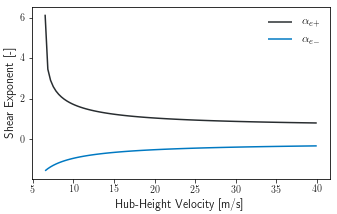

In [9]:
fig, ax = plt.subplots(figsize=(5,3))

ax.plot(vhubs, apos, label=r'$\alpha_{e+}$')
ax.plot(vhubs, aneg, label=r'$\alpha_{e-}$')

ax.set_ylabel('Shear Exponent [-]')
ax.set_xlabel('Hub-Height Velocity [m/s]')
# ax.set_title('Extreme Shear Profiles')

ax.legend(frameon=False)

fig.savefig('../figs_20181227/EWS_alpha_limits.png', dpi=200, bbox_inches='tight')

/Users/nhamilto/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in power


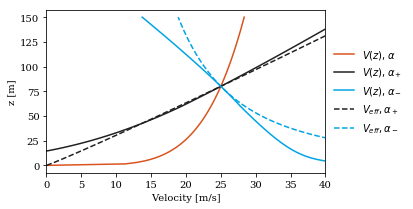

In [10]:
fig,ax = plt.subplots(figsize=(5,3))

Vhub=25
Vnom = Vhub * (z/zhub)**alpha_nom

ax.plot(Vnom, z, c='C2', ls='-', label=r'$V(z), \alpha$')
ax.plot(Vpos[:,50], z, c='C0', ls='-', label=r'$V(z), \alpha_+$')
ax.plot(Vneg[:,50], z, c='C1', ls='-', label=r'$V(z), \alpha_-$')

ztopind = np.argmin(np.abs(z - ztop))
zbotind = np.argmin(np.abs(z - zbot))

alpha_pos = np.log(Vpos[ztopind, 50]/Vpos[zbotind, 50])/np.log(ztop/zbot)
alpha_neg = np.log(Vneg[ztopind, 50]/Vneg[zbotind, 50])/np.log(ztop/zbot)

Vposal = Vhub * (z/zhub)**alpha_pos
Vnegal = Vhub * (z/zhub)**alpha_neg

ax.plot(Vposal, z, c='C0', ls='--', label=r'$V_{eff}, \alpha_+$')
ax.plot(Vnegal, z, c='C1', ls='--', label=r'$V_{eff}, \alpha_-$')

ax.set_xlim(0,40)
ax.legend(loc=6, bbox_to_anchor=(1,0.5), frameon=False)

ax.set_ylabel('z [m]')
ax.set_xlabel('Velocity [m/s]')
fig.savefig('../figs_20181227/EWS_profile_comp_w_effective_alpha.png', dpi=200, bbox_inches='tight')